In [48]:
import pandas as pd
a = pd.read_csv('./최종코드/신사동_빌딩추천') # 유수빈_입지추천모델_meanshift.ipynb를 기반으로 동별 빌딩추천 csv불러옴
b = pd.read_csv('./최종코드/역삼동_빌딩추천')
c = pd.read_csv('./최종코드/논현동_빌딩추천')
d = pd.read_csv('./최종코드/망원동_빌딩추천')
e = pd.read_csv('./최종코드/서교동_빌딩추천')

building = pd.concat([a,b,c,d,e], axis =0)
building = building.drop(['Unnamed: 0'], axis =1)
building.reset_index(inplace=True, drop=True)
building

,dist_scaled,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,dist,편의성,totals
0,-0.916952,1.627467,-0.719306,0.016752,-0.868383,강남구 신사동,127.024693,37.518675,NaN,14,460.13,108.07,38.24,강남구,신사동,0.002221,-3.198404,-7.132556
1,-0.703264,1.046229,-0.754611,-0.305727,-1.166074,강남구 신사동,127.024418,37.518536,인우빌딩(INWOO),13,431.30,84.18,35.96,강남구,신사동,0.002479,-3.272641,-6.945650
2,1.093399,1.046229,-0.434383,-0.376999,-1.798731,강남구 신사동,127.023668,37.518429,제이타워,13,370.03,78.90,56.64,강남구,신사동,0.004650,-3.656342,-4.941318
3,-0.773484,-0.116248,-0.282786,-1.324998,1.012448,강남구 신사동,127.029256,37.520737,NaN,11,642.28,8.67,66.43,강남구,신사동,0.002394,-0.479088,-2.022585
4,0.223754,0.464991,-0.710789,-0.996310,1.368582,강남구 신사동,127.029092,37.520414,NaN,12,676.77,33.02,38.79,강남구,신사동,0.003600,-0.803507,-1.110683
5,-1.145725,-0.697486,-0.579012,0.225708,0.992622,강남구 신사동,127.030850,37.521033,동남빌딩,10,640.36,123.55,47.30,강남구,신사동,0.001945,1.336804,0.687660
6,-0.669039,-0.697486,0.543645,-0.178302,0.324754,강남구 신사동,127.029793,37.521409,디오사옥,10,575.68,93.62,119.80,강남구,신사동,0.002521,1.387583,1.494091
7,1.802707,-0.116248,-0.094489,-0.026039,0.705154,강남구 신사동,127.030301,37.521163,NaN,11,612.52,104.90,78.59,강남구,신사동,0.005508,0.700874,3.965634
8,1.324742,-0.697486,0.310906,0.357319,-0.253486,강남구 신사동,127.029386,37.521864,NaN,10,519.68,133.30,104.77,강남구,신사동,0.004930,1.112224,3.989116
9,-0.236137,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,0.003044,6.872498,12.016290


In [49]:
len(building)

39

In [50]:
demand_x = ['37.5660109076635', ' 37.57148160279159', '37.557847102623114', '37.52801200937298 ']  #위도    # 수요기업의 직원들 위경도를 demand_x와 demand_y에 저장한다. 
demand_y = ['126.9203712025', '126.93009481604902  ' ,'126.96528295939153','127.03319657780496'] # 경도

# (새마을 아파트) 37.5660109076635, 126.9203712025
#(연희빌) 37.57148160279159 이고, 경도는 126.93009481604902 
##(충정로 한 아파트) 37.557847102623114 이고, 경도는 126.96528295939153
# (녹번 힐스테이트) 37.60169970041055 이고, 경도는 126.93592123324035 
##(관악 타운 아파트) 37.39562106827665 이고, 경도는 126.94379908913108 
# 37.36974011392359 이고, 경도는 126.936773828485 
# 광명시 한 아파트?  37.479755022139265 이고, 경도는 126.87110699651576 
# 역삼 한 오피스텔 37.49801200937298 이고, 경도는 127.03319657780496

### 37.4970568884636 이고, 경도는 127.03338839981292 
building_x = building['위도']
building_y = building['경도']


In [51]:
demand_x = list(map(float, demand_x))
demand_y= list(map(float,demand_y))

building_x = list(map(float, building_x))
building_y = list(map(float, building_y))

import pandas as pd
import matplotlib.pyplot as plt
a = pd.concat([pd.DataFrame(demand_x), pd.DataFrame(demand_y)], axis=1)
a.columns = ['x', 'y']

b = pd.concat([pd.DataFrame(building_x ), pd.DataFrame(building_y)], axis=1)
b.columns = ['x', 'y']

a['type'] = 1  #수요기업 직원들의 위경도
b['type'] = 2  #거점오피스의 위경도 

all_data = pd.concat([a, b], axis=0)
all_data.reset_index(drop=True, inplace=True)
all_data

,x,y,type
0,37.566011,126.920371,1
1,37.571482,126.930095,1
2,37.557847,126.965283,1
3,37.528012,127.033197,1
4,37.518675,127.024693,2
5,37.518536,127.024418,2
6,37.518429,127.023668,2
7,37.520737,127.029256,2
8,37.520414,127.029092,2
9,37.521033,127.030850,2


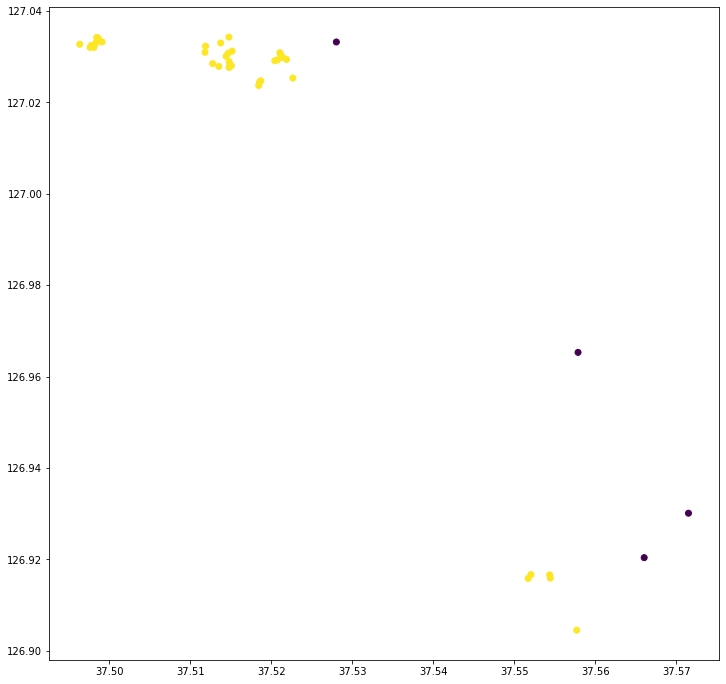

In [52]:
plt.figure(figsize=(12, 12))
plt.scatter(all_data['x'], all_data['y'], c=all_data['type'])    #노란색은 거점오피스 데이터, 보라색은 수요기업 직원데이터 
#plt.xlim([1, 4])
#plt.ylim([0, 9])

In [53]:
import numpy as np

print(type(demand_x))
demand_x = np.array(demand_x)
print(type(demand_x))
demand_y = np.array(demand_y)
building_x = np.array(building_x)
building_y = np.array(building_y)

<class 'list'>
<class 'numpy.ndarray'>


In [54]:
all_data.loc[len(all_data)] = [np.mean(demand_x), np.mean(demand_y), 3]   # 직원들의 위치의 평균을 type3으로 지정

In [55]:
all_data

,x,y,type
0,37.566011,126.920371,1.0
1,37.571482,126.930095,1.0
2,37.557847,126.965283,1.0
3,37.528012,127.033197,1.0
4,37.518675,127.024693,2.0
5,37.518536,127.024418,2.0
6,37.518429,127.023668,2.0
7,37.520737,127.029256,2.0
8,37.520414,127.029092,2.0
9,37.521033,127.030850,2.0


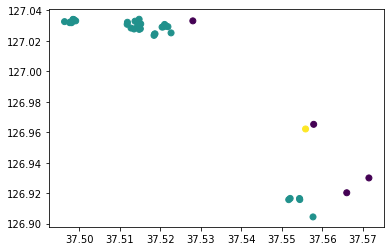

In [56]:
plt.scatter(all_data['x'], all_data['y'], c=all_data['type'])
#plt.xlim([1, 4])
#plt.ylim([0, 9])

In [57]:
mean_x, mean_y = np.mean(demand_x), np.mean(demand_y)
building_x

array([37.51867539, 37.51853562, 37.51842874, 37.52073747, 37.52041375,
       37.52103339, 37.52140853, 37.52116267, 37.52186369, 37.52263493,
       37.49909026, 37.49866635, 37.49806754, 37.49855053, 37.49842869,
       37.49760677, 37.49821866, 37.49777441, 37.49836241, 37.49855884,
       37.49633535, 37.51465334, 37.51514628, 37.51475251, 37.51439726,
       37.51476953, 37.51179373, 37.51274641, 37.51504885, 37.51373519,
       37.51350221, 37.51186036, 37.51488828, 37.51475515, 37.55768182,
       37.55434697, 37.55441761, 37.55203691, 37.55168738])

In [58]:
radius = 0.00000002    #직원들의 위치 중심으로 부터 반경을 넓혀가며 거점오피스 찾기 
flag = 0
result_building_location = {"x":[],"y":[], "i":[], 'distance':[]}

while True:
    for i in range(len(building_x)):
        distance = np.sqrt((building_x[i] - mean_x) ** 2 + (building_y[i] - mean_y) ** 2)
        if distance <= radius:
            if i in result_building_location['i']:
                continue
            print(i,'번째', building_x[i], building_y[i])
            result_building_location['x'].append(building_x[i])
            result_building_location['y'].append(building_y[i])
            result_building_location['i'].append(i)
            result_building_location['distance'].append(distance)
            flag += 1
    if flag > 5:
        break
    else:
        radius += 0.0002
        print('현재 radius', radius)

현재 radius 0.00020002
현재 radius 0.00040002
현재 radius 0.00060002
현재 radius 0.00080002
현재 radius 0.0010000200000000001
현재 radius 0.0012000200000000002
현재 radius 0.0014000200000000003
현재 radius 0.0016000200000000004
현재 radius 0.0018000200000000005
현재 radius 0.0020000200000000004
현재 radius 0.0022000200000000004
현재 radius 0.0024000200000000005
현재 radius 0.0026000200000000006
현재 radius 0.0028000200000000007
현재 radius 0.003000020000000001
현재 radius 0.003200020000000001
현재 radius 0.003400020000000001
현재 radius 0.003600020000000001
현재 radius 0.003800020000000001
현재 radius 0.004000020000000001
현재 radius 0.0042000200000000005
현재 radius 0.00440002
현재 radius 0.00460002
현재 radius 0.0048000199999999995
현재 radius 0.005000019999999999
현재 radius 0.005200019999999999
현재 radius 0.005400019999999998
현재 radius 0.005600019999999998
현재 radius 0.005800019999999998
현재 radius 0.006000019999999997
현재 radius 0.006200019999999997
현재 radius 0.006400019999999997
현재 radius 0.006600019999999996
현재 radius 0.0068000199999

In [60]:
result_building_location    # 선정된 거점오피스 정보를 result_building_location에 저장

{'x': [37.55434696707374,
  37.55203691146401,
  37.55441760775437,
  37.551687376114586,
  37.55768182382533,
  37.52263493499234],
 'y': [126.91659760298924,
  126.91665807179251,
  126.91589953138376,
  126.91582880771486,
  126.90450840448523,
  127.02530384170817],
 'i': [35, 37, 36, 38, 34, 9],
 'distance': [0.04566313261763268,
  0.045736534085846284,
  0.04635861962848149,
  0.0465928158619663,
  0.05775742569719053,
  0.07127370382648121]}

In [61]:
a['type'] = 'residential_area'   #수요기업 직원들의 위경도 

b['type'] = 'building'   #거점오피스의 위경도 
b.loc[result_building_location['i'], 'type'] = 'here!'  # 선정된 거점오피스

all_data = pd.concat([a, b], axis=0)
all_data.reset_index(drop=True, inplace=True)
all_data.loc[len(all_data)] = [np.mean(demand_x), np.mean(demand_y), 'center']
all_data

,x,y,type
0,37.566011,126.920371,residential_area
1,37.571482,126.930095,residential_area
2,37.557847,126.965283,residential_area
3,37.528012,127.033197,residential_area
4,37.518675,127.024693,building
5,37.518536,127.024418,building
6,37.518429,127.023668,building
7,37.520737,127.029256,building
8,37.520414,127.029092,building
9,37.521033,127.030850,building


In [62]:
candidates = all_data[all_data['type'] == 'here!']
candidates['dist'] = result_building_location['distance']
candidates = candidates.sort_values('dist', ascending=True)
candidates

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,type,dist
13,37.522635,127.025304,here!,0.045663
38,37.557682,126.904508,here!,0.045737
39,37.554347,126.916598,here!,0.046359
40,37.554418,126.915900,here!,0.046593
41,37.552037,126.916658,here!,0.057757
42,37.551687,126.915829,here!,0.071274


In [63]:
candidates

,x,y,type,dist
13,37.522635,127.025304,here!,0.045663
38,37.557682,126.904508,here!,0.045737
39,37.554347,126.916598,here!,0.046359
40,37.554418,126.915900,here!,0.046593
41,37.552037,126.916658,here!,0.057757
42,37.551687,126.915829,here!,0.071274


[None]

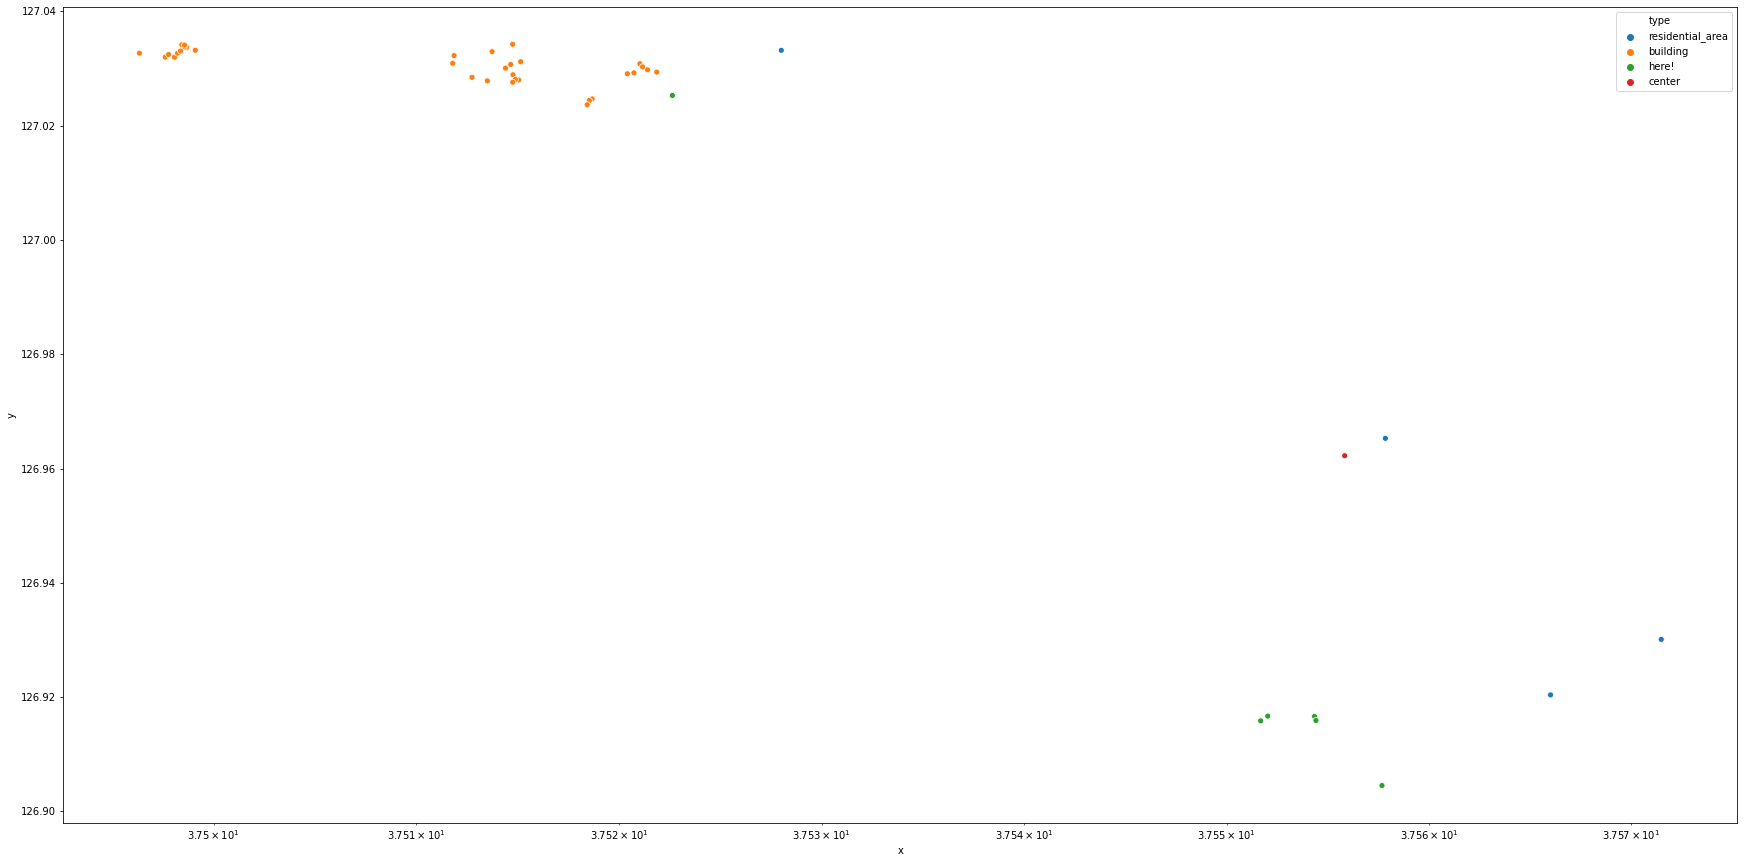

In [64]:
import seaborn as sns
plt.figure(figsize = (30,15))

g =sns.scatterplot(x="x", y="y",
              hue="type",
              data=all_data)

g.set(xscale="log")

In [65]:
a

,x,y,type
0,37.566011,126.920371,residential_area
1,37.571482,126.930095,residential_area
2,37.557847,126.965283,residential_area
3,37.528012,127.033197,residential_area


In [75]:
here_idx=[]
for i in range(len(candidates)):
    a=building[building['위도']==candidates['x'].iloc[i]]
    here_idx.append(a[a['경도']==candidates['y'].iloc[i]].index)


here_idx   # 선정된 거점오피스의 인덱스를 기반으로 빌딩데이터와 매칭

[Int64Index([9], dtype='int64'),
 Int64Index([34], dtype='int64'),
 Int64Index([35], dtype='int64'),
 Int64Index([36], dtype='int64'),
 Int64Index([37], dtype='int64'),
 Int64Index([38], dtype='int64')]

In [76]:
k = np.array(here_idx)

idx=[]
for i in k:
    idx.append(i[0])
    
idx

[9, 34, 35, 36, 37, 38]

In [77]:
here_building = building.iloc[idx]   #기존 빌딩데이터에서 선정된곳을 here_building으로 저장
here_building

,dist_scaled,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,dist,편의성,totals
9,-0.236137,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,0.003044,6.872498,12.016290
34,0.000000,0.000000,0.000000,0.000000,0.000000,마포구 망원동,126.904508,37.557682,NaN,1,524.62,772.06,295.77,마포구,망원동,0.001218,0.000000,0.000000
35,0.665902,1.000000,-0.888862,-1.541515,1.022180,마포구 서교동,126.916598,37.554347,NaN,8,527.28,277.30,20.38,마포구,서교동,0.001504,-2.408198,-3.335903
36,-0.231976,1.000000,-0.872469,-0.222723,0.935130,마포구 서교동,126.915900,37.554418,도일 오피스텔,8,516.02,338.57,20.64,마포구,서교동,0.001367,-1.160061,-2.436074
37,-1.522455,-1.000000,0.210748,0.787627,-0.691297,마포구 서교동,126.916658,37.552037,삼성화재 합정사옥,6,305.64,385.51,37.82,마포구,서교동,0.001169,1.307078,0.069059
38,1.088528,-1.000000,1.550583,0.976611,-1.266013,마포구 서교동,126.915829,37.551687,NaN,6,231.30,394.29,59.07,마포구,서교동,0.001568,2.261181,5.702918


In [82]:
here_building = here_building.drop(['dist_scaled','dist'],axis =1) 
here_building

,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,편의성,totals
9,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,6.872498,12.016290
34,0.000000,0.000000,0.000000,0.000000,마포구 망원동,126.904508,37.557682,NaN,1,524.62,772.06,295.77,마포구,망원동,0.000000,0.000000
35,1.000000,-0.888862,-1.541515,1.022180,마포구 서교동,126.916598,37.554347,NaN,8,527.28,277.30,20.38,마포구,서교동,-2.408198,-3.335903
36,1.000000,-0.872469,-0.222723,0.935130,마포구 서교동,126.915900,37.554418,도일 오피스텔,8,516.02,338.57,20.64,마포구,서교동,-1.160061,-2.436074
37,-1.000000,0.210748,0.787627,-0.691297,마포구 서교동,126.916658,37.552037,삼성화재 합정사옥,6,305.64,385.51,37.82,마포구,서교동,1.307078,0.069059
38,-1.000000,1.550583,0.976611,-1.266013,마포구 서교동,126.915829,37.551687,NaN,6,231.30,394.29,59.07,마포구,서교동,2.261181,5.702918


In [83]:
dist = candidates['dist'].values
dist

array([0.04566313, 0.04573653, 0.04635862, 0.04659282, 0.05775743,
       0.0712737 ])

In [84]:
here_building['dist']=dist  #사용자 중심에서 얼마나 떨어져 있는지 dist컬럼으로 저장
here_building

,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,편의성,totals,dist
9,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,6.872498,12.016290,0.045663
34,0.000000,0.000000,0.000000,0.000000,마포구 망원동,126.904508,37.557682,NaN,1,524.62,772.06,295.77,마포구,망원동,0.000000,0.000000,0.045737
35,1.000000,-0.888862,-1.541515,1.022180,마포구 서교동,126.916598,37.554347,NaN,8,527.28,277.30,20.38,마포구,서교동,-2.408198,-3.335903,0.046359
36,1.000000,-0.872469,-0.222723,0.935130,마포구 서교동,126.915900,37.554418,도일 오피스텔,8,516.02,338.57,20.64,마포구,서교동,-1.160061,-2.436074,0.046593
37,-1.000000,0.210748,0.787627,-0.691297,마포구 서교동,126.916658,37.552037,삼성화재 합정사옥,6,305.64,385.51,37.82,마포구,서교동,1.307078,0.069059,0.057757
38,-1.000000,1.550583,0.976611,-1.266013,마포구 서교동,126.915829,37.551687,NaN,6,231.30,394.29,59.07,마포구,서교동,2.261181,5.702918,0.071274


In [85]:
from sklearn.preprocessing import StandardScaler

# 객체생성
scaler = StandardScaler()

scaler = StandardScaler()
A_n = scaler.fit_transform(here_building['dist'].values.reshape(-1,1))
here_building.insert(0, 'dist_scaled', A_n)

In [86]:
here_building

,dist_scaled,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,편의성,totals,dist
9,-0.689220,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,6.872498,12.016290,0.045663
34,-0.681517,0.000000,0.000000,0.000000,0.000000,마포구 망원동,126.904508,37.557682,NaN,1,524.62,772.06,295.77,마포구,망원동,0.000000,0.000000,0.045737
35,-0.616230,1.000000,-0.888862,-1.541515,1.022180,마포구 서교동,126.916598,37.554347,NaN,8,527.28,277.30,20.38,마포구,서교동,-2.408198,-3.335903,0.046359
36,-0.591651,1.000000,-0.872469,-0.222723,0.935130,마포구 서교동,126.915900,37.554418,도일 오피스텔,8,516.02,338.57,20.64,마포구,서교동,-1.160061,-2.436074,0.046593
37,0.580054,-1.000000,0.210748,0.787627,-0.691297,마포구 서교동,126.916658,37.552037,삼성화재 합정사옥,6,305.64,385.51,37.82,마포구,서교동,1.307078,0.069059,0.057757
38,1.998564,-1.000000,1.550583,0.976611,-1.266013,마포구 서교동,126.915829,37.551687,NaN,6,231.30,394.29,59.07,마포구,서교동,2.261181,5.702918,0.071274


In [87]:
here_building['totals']=1.8*here_building['dist_scaled']+1.5*here_building['편의성']  #편의성열과 dist_scaled열을 기반으로 totals열 생성 
here_building

,dist_scaled,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,편의성,totals,dist
9,-0.689220,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,6.872498,9.068150,0.045663
34,-0.681517,0.000000,0.000000,0.000000,0.000000,마포구 망원동,126.904508,37.557682,NaN,1,524.62,772.06,295.77,마포구,망원동,0.000000,-1.226730,0.045737
35,-0.616230,1.000000,-0.888862,-1.541515,1.022180,마포구 서교동,126.916598,37.554347,NaN,8,527.28,277.30,20.38,마포구,서교동,-2.408198,-4.721510,0.046359
36,-0.591651,1.000000,-0.872469,-0.222723,0.935130,마포구 서교동,126.915900,37.554418,도일 오피스텔,8,516.02,338.57,20.64,마포구,서교동,-1.160061,-2.805065,0.046593
37,0.580054,-1.000000,0.210748,0.787627,-0.691297,마포구 서교동,126.916658,37.552037,삼성화재 합정사옥,6,305.64,385.51,37.82,마포구,서교동,1.307078,3.004715,0.057757
38,1.998564,-1.000000,1.550583,0.976611,-1.266013,마포구 서교동,126.915829,37.551687,NaN,6,231.30,394.29,59.07,마포구,서교동,2.261181,6.989186,0.071274


In [88]:
here_building = here_building.sort_values('totals', ascending=True)  #최종 선정 거점오피스 (totals를 기준으로 정렬처리)
here_building

,dist_scaled,대규모점포수_scaled,대로변거리_scaled,종합병원거리_scaled,지하철거리_scaled,주소,경도,위도,건물 이름,주변 대규모 점포 수,지하철거리(m),종합병원거리(m),대로변거리(m),자치구명,법정동명,편의성,totals,dist
35,-0.616230,1.000000,-0.888862,-1.541515,1.022180,마포구 서교동,126.916598,37.554347,NaN,8,527.28,277.30,20.38,마포구,서교동,-2.408198,-4.721510,0.046359
36,-0.591651,1.000000,-0.872469,-0.222723,0.935130,마포구 서교동,126.915900,37.554418,도일 오피스텔,8,516.02,338.57,20.64,마포구,서교동,-1.160061,-2.805065,0.046593
34,-0.681517,0.000000,0.000000,0.000000,0.000000,마포구 망원동,126.904508,37.557682,NaN,1,524.62,772.06,295.77,마포구,망원동,0.000000,-1.226730,0.045737
37,0.580054,-1.000000,0.210748,0.787627,-0.691297,마포구 서교동,126.916658,37.552037,삼성화재 합정사옥,6,305.64,385.51,37.82,마포구,서교동,1.307078,3.004715,0.057757
38,1.998564,-1.000000,1.550583,0.976611,-1.266013,마포구 서교동,126.915829,37.551687,NaN,6,231.30,394.29,59.07,마포구,서교동,2.261181,6.989186,0.071274
9,-0.689220,-1.859962,2.720825,2.608597,-0.316886,강남구 신사동,127.025304,37.522635,NaN,8,513.54,300.08,260.40,강남구,신사동,6.872498,9.068150,0.045663
